In [1]:
import pandas as pd
import numpy as np
import pylab as py
import scipy.optimize as opt
from sklearn import preprocessing

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bishop, Mr. Dickinson H",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.drop('Cabin', axis=1, inplace=True)

In [7]:
#get dummies and change the object into 1 0
dummy_1=pd.get_dummies(df['Sex'])
df=pd.concat([df,dummy_1],axis=1)
df.head()
df.drop('Sex',axis=1, inplace=True)
df.drop('male',axis=1, inplace=True)

In [8]:
df.shape

(891, 11)

In [10]:
#check the categorical value Embacked, to see if that's correlated with survival
em_counts=df['Embarked'].value_counts().to_frame()
df.Embarked[0:10]

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [14]:
df=df.replace('S',0)
df=df.replace('C',2)
df=df.replace('Q',1)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2.0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,0


In [15]:
survival=df[['Embarked','Survived']].groupby(['Embarked']).mean()
survival

,Survived
Embarked,
0.0,0.336957
1.0,0.389610
2.0,0.553571


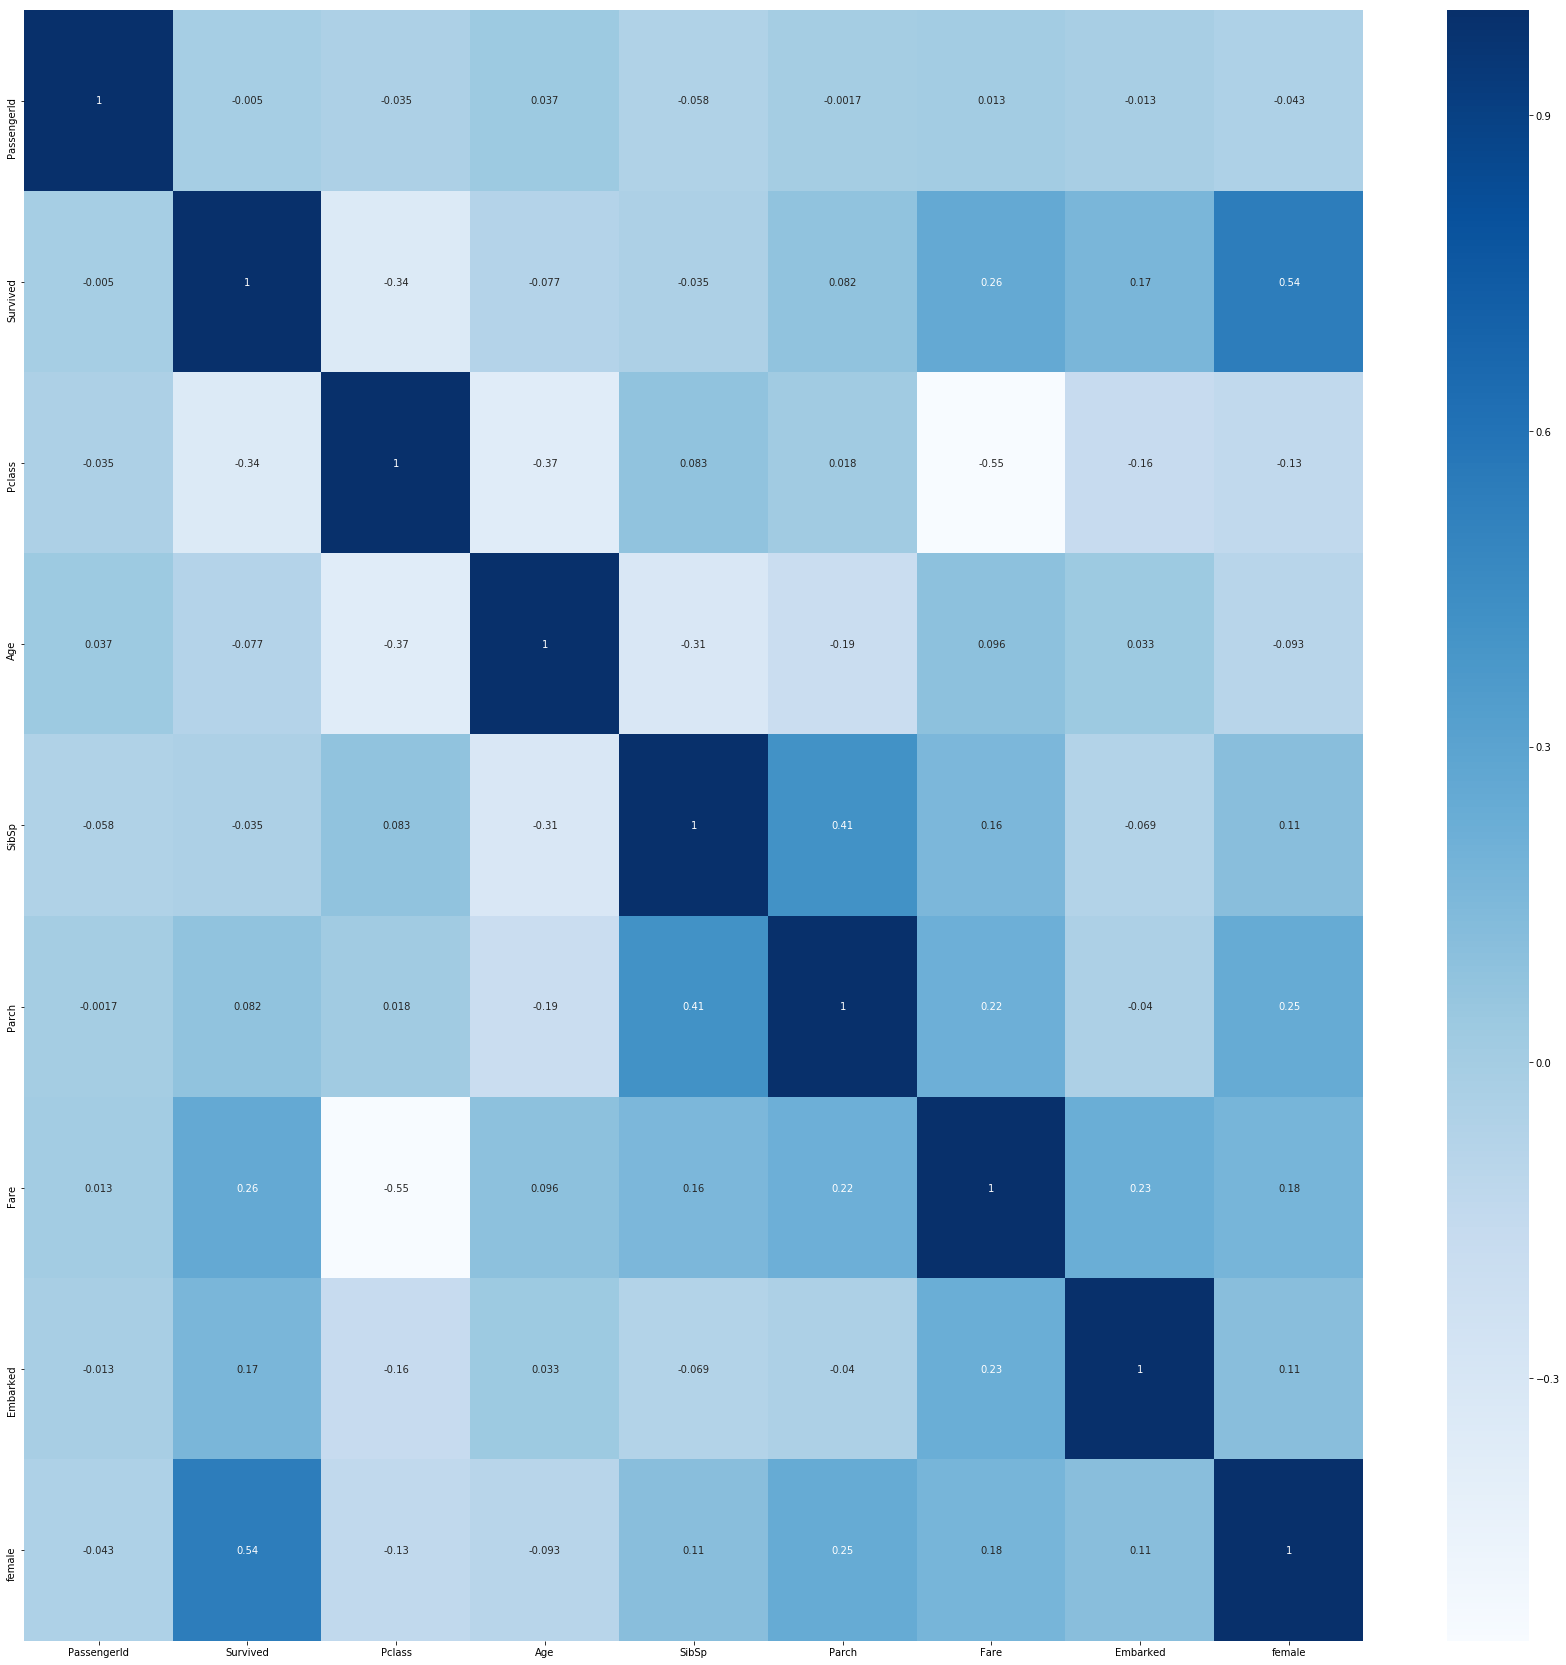

In [16]:
df.corr()
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='Blues')
plt.show()

In [24]:
df=df.dropna(axis=0)
df.shape

(712, 11)

In [25]:
feature_df = df[['female', 'Pclass', 'Fare','Embarked']]
X = np.asarray(feature_df)
print(X[0:5])

y = np.asarray(df['Survived'])
print(y [0:5])

[[ 0.      3.      7.25    0.    ]
 [ 1.      1.     71.2833  2.    ]
 [ 1.      3.      7.925   0.    ]
 [ 1.      1.     53.1     0.    ]
 [ 0.      3.      8.05    0.    ]]
[0 1 1 1 0]


In [26]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X, y) 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
#import test set 
dft=pd.read_csv("test.csv")
dfy=pd.read_csv('gender_submission.csv')
dfj=pd.merge(dft,dfy,on='PassengerId')
dfj.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [30]:
dummy_2=pd.get_dummies(dfj['Sex'])
dfj=pd.concat([dfj,dummy_2],axis=1)
dfj.drop(['Sex'], axis=1, inplace=True)

dfj=dfj.replace('S',0)
dfj=dfj.replace('C',2)
dfj=dfj.replace('Q',1)

In [31]:
dfj.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,female,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,1,1,0


In [76]:
dfx=dfj[['female', 'Pclass', 'Fare','Embarked']]


In [77]:
dfx['Fare'].replace(np.nan, dfx['Fare'].mean(), inplace=True)

In [80]:
dfx.isnull().sum()


female      0
Pclass      0
Fare        0
Embarked    0
dtype: int64

In [81]:
x = np.asarray(dfx)
print(x[0:5])

Y = np.asarray(dfj['Survived'])
print(Y [0:5])

[[ 0.      3.      7.8292  1.    ]
 [ 1.      3.      7.      0.    ]
 [ 0.      2.      9.6875  1.    ]
 [ 0.      3.      8.6625  0.    ]
 [ 1.      3.     12.2875  0.    ]]
[0 1 0 0 1]


In [82]:
yhat=clf.predict(x)

In [83]:
len(yhat)

418

In [84]:
len(Y)

418

[[122  30]
 [ 44 222]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       266
           1       0.73      0.80      0.77       152

   micro avg       0.82      0.82      0.82       418
   macro avg       0.81      0.82      0.81       418
weighted avg       0.83      0.82      0.82       418

Confusion matrix, without normalization
[[122  30]
 [ 44 222]]


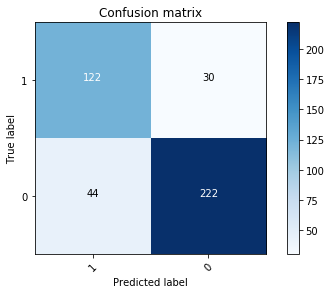

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y, yhat, labels=[1,0]))
cnf_matrix = confusion_matrix(Y, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(Y, yhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [88]:
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
from sklearn.metrics import log_loss
SVM_Ja=jaccard_similarity_score(Y, yhat)
SVM_Ac=metrics.accuracy_score(Y,yhat)
print('Jaccard similarity:',jaccard_similarity_score(Y, yhat))
print("SVM Accuracy: ", metrics.accuracy_score(Y, yhat))

Jaccard similarity: 0.8229665071770335
SVM Accuracy:  0.8229665071770335


In [98]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.1, solver='liblinear').fit(X,y)

#make predictions with test set
lyhat = LR.predict(x)
lyhat

#predict_proba returns estimates for all classes
lyhat_prob = LR.predict_proba(x)
lyhat_prob[0:5]

parameters = LR.coef_
parameters

array([[ 1.84, -0.65,  0.  ,  0.21]])

Jaccard similarity: 0.9473684210526315
LR Accuracy:  0.9473684210526315
log loss: 1.8178724206495207
[[152   0]
 [ 22 244]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       266
           1       0.87      1.00      0.93       152

   micro avg       0.95      0.95      0.95       418
   macro avg       0.94      0.96      0.94       418
weighted avg       0.95      0.95      0.95       418

Confusion matrix, without normalization
[[152   0]
 [ 22 244]]


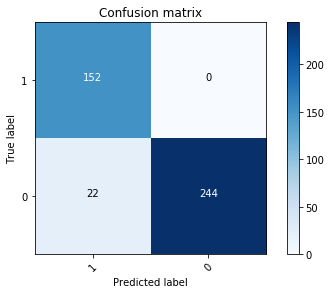

In [99]:
L_Ja=jaccard_similarity_score(Y, lyhat)
L_Ac=metrics.accuracy_score(Y, lyhat)
L_LL=log_loss(Y, lyhat)
print('Jaccard similarity:',jaccard_similarity_score(Y, lyhat))
print("LR Accuracy: ", metrics.accuracy_score(Y, lyhat))
print('log loss:',log_loss(Y, lyhat))

print(confusion_matrix(Y, lyhat, labels=[1,0]))
cnf_matrix = confusion_matrix(Y, lyhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(Y, lyhat))
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

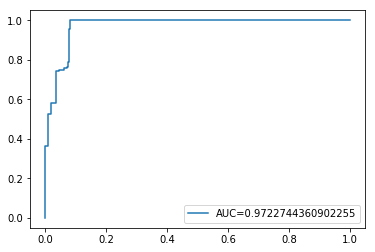

In [101]:
yhat_prob2=lyhat_prob[::,1]
fpr,tpr,_ =metrics.roc_curve(Y,yhat_prob2)
auc=metrics.roc_auc_score(Y,yhat_prob2)
plt.plot(fpr,tpr, label='AUC='+str(auc))
plt.legend(loc=4)
plt.show()

In [113]:
dfr=pd.DataFrame(lyhat)
dfy['lyhat']=pd.Series(lyhat, index=dfy.index)
dfy.drop('Survived', axis=1, inplace=True)

In [125]:
dfy=dfy.rename(columns={'lyhat':'Survived'})
dfy.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [126]:
dfy.to_csv('prediction', index=False, sep=',',encoding='utf-8')